In [ ]:
'''
There are three different implementations of Support Vector Regression: 
SVR, NuSVR and LinearSVR. 

LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

See Implementation details for further details.
'''

In [12]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.svm import SVR
import numpy as np

regressor = SVR()
parameters = {'C': [0.1,1,10,100,1000],
             'epsilon': [0.01,0.1,1,10],
             'gamma':['auto','scale'],
             'kernel': ['rbf','poly'],
             'degree': [2,3,4,5,6]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.1, epsilon=0.01, gamma=auto, kernel=rbf .....................
[CV]  C=0.1, epsilon=0.01, gamma=auto, kernel=rbf, score=-0.028112641703757157, total=   0.0s
[CV] C=0.1, epsilon=0.01, gamma=auto, kernel=rbf .....................
[CV]  C=0.1, epsilon=0.01, gamma=auto, kernel=rbf, score=-0.01501999492732442, total=   0.0s
[CV] C=0.1, epsilon=0.01, gamma=auto, kernel=rbf .....................
[CV]  C=0.1, epsilon=0.01, gamma=auto, kernel=rbf, score=-0.005450794206850684, total=   0.0s
[CV] C=0.1, epsilon=0.01, gamma=scale, kernel=rbf ....................
[CV]  C=0.1, epsilon=0.01, gamma=scale, kernel=rbf, score=0.01759991190231236, total=   0.0s
[CV] C=0.1, epsilon=0.01, gamma=scale, kernel=rbf ....................
[CV]  C=0.1, epsilon=0.01, gamma=scale, kernel=rbf, score=0.026361962473442028, total=   0.0s
[CV] C=0.1, epsilon=0.01, gamma=scale, kernel=rbf ....................
[CV]  C=0.1, epsilon=0.01, gamma=scale, kern

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, epsilon=1, gamma=scale, kernel=rbf, score=0.011268897569744807, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=scale, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=scale, kernel=rbf, score=0.021565877597094607, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=scale, kernel=rbf .......................
[CV]  C=0.1, epsilon=1, gamma=scale, kernel=rbf, score=0.037375934244827436, total=   0.0s
[CV] C=0.1, epsilon=10, gamma=auto, kernel=rbf .......................
[CV]  C=0.1, epsilon=10, gamma=auto, kernel=rbf, score=0.0013982134581724814, total=   0.0s
[CV] C=0.1, epsilon=10, gamma=auto, kernel=rbf .......................
[CV]  C=0.1, epsilon=10, gamma=auto, kernel=rbf, score=0.00018233592034111457, total=   0.0s
[CV] C=0.1, epsilon=10, gamma=auto, kernel=rbf .......................
[CV]  C=0.1, epsilon=10, gamma=auto, kernel=rbf, score=-0.008306318956457837, total=   0.0s
[CV] C=0.1, epsilon=10, gamma=scale, kernel=rbf ......................
[CV]  C=0.1, epsilon=10,

[CV]  C=100, epsilon=0.01, gamma=scale, kernel=rbf, score=0.6454862712489856, total=   0.0s
[CV] C=100, epsilon=0.01, gamma=scale, kernel=rbf ....................
[CV]  C=100, epsilon=0.01, gamma=scale, kernel=rbf, score=0.5964298393717624, total=   0.0s
[CV] C=100, epsilon=0.01, gamma=scale, kernel=rbf ....................
[CV]  C=100, epsilon=0.01, gamma=scale, kernel=rbf, score=0.34605504724454217, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................
[CV]  C=100, epsilon=0.1, gamma=auto, kernel=rbf, score=0.17620909838671228, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................
[CV]  C=100, epsilon=0.1, gamma=auto, kernel=rbf, score=0.057028714495221844, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................
[CV]  C=100, epsilon=0.1, gamma=auto, kernel=rbf, score=0.08986326247618714, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=scale, kernel=rbf .....................
[CV]  C=100, epsilon=0.

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.2s finished


0.7335638355391952

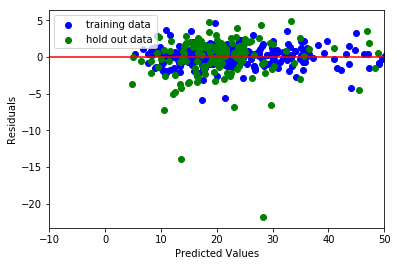

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
print("MSE train: ", mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, gs.predict(X_test)))

MSE train:  1.4548531670228686
MSE test:  9.133281316612088
